In [1]:
# ── 0_install_deps.ipynb ──
import importlib, subprocess, sys
# List your packages (matplotlib covers matplotlib.pyplot)
dependencies = ["numba", "numpy", "matplotlib", "tqdm"]

for pkg in dependencies:
    if importlib.util.find_spec(pkg) is None:
        print(f"Installing {pkg}…")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])
    else:
        # optional: uncomment next line to see which ones were already present
        print(f"{pkg} already installed")
        pass

numba already installed
numpy already installed
matplotlib already installed
tqdm already installed


In [2]:
import numpy as np
import os
import utilities.update
from utilities.simulation import Simulation, Simulation2, Simulation3
import settings.settings_task2 as settings
import settings.settings_task3 as settings3
# import pandas as pd
import matplotlib.pyplot as plt
import logging
from utilities import utils

settings.init(10)
settings3.init(10)

# Initializing the system

In [3]:
# Set up output folder creation and logging
output_dir = utils.create_output_directory()
utils.setup_logging(output_dir)

[INFO] Writing all files to output\run_53/


# Testing

In [4]:
# Simulation2(output_dir, True, "Try01_", 100, settings.random_seed, settings)

## Task 3 & 4

In [12]:
Cs_list = [10, 100, 333, 666, 1000] # Salt conentraction which will be multiplied by sigma=1
settings3.init(Cs_list[3])

In [15]:
g_of_r = Simulation3(output_dir, True, "Task3_", 10, settings3.random_seed, settings3)

g_of_r_list = []

for i in range(len(Cs_list)):
    settings3.init(Cs_list[i])
    g_of_r = Simulation3(output_dir, True, f"Task3_Cs{Cs_list[i]}_", 10, settings3.random_seed, settings3)
    g_of_r_list.append(g_of_r)

bin_dr_arr = np.linspace(0, settings3.L/2, len(g_of_r)) + 0.5*settings3.dr

100%|██████████| 8000/8000 [00:05<00:00, 1556.07it/s]


In [17]:
print(len(g_of_r_list[3]))

499


ValueError: '..' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

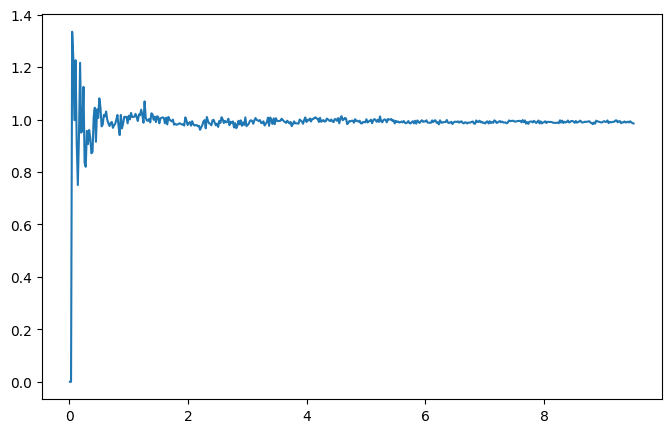

In [ ]:
# devide by 4.184e-6 to go from g/mol × (nm/fs)^2 --> kcal
plt.figure(figsize=(8,5))
# devide by 4.184e-6 to go from g/mol × (nm/fs)^2 --> kcal

plt.plot(bin_dr_arr, g_of_r_list[0], label=r"$g(r) min$")  
plt.plot(bin_dr_arr, g_of_r_list[4], label=r"$g(r) max$", linestyle=':')  
plt.xlabel("r")
plt.ylabel("g(r)")
plt.legend()
# plt.title("")
plt.tight_layout()
# plt.savefig('part_c_energies.pdf', dpi=150)